## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidence your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [30]:
# Add your package imports here
import os
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from numpy import mean, absolute
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import mysql.connector
from getpass import getpass
from mysql.connector import connect, Error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [3]:
df = pd.read_csv('C:\\Users\\emilp\\Downloads\\2022_2023\\NAC_Data.csv')

## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

<Axes: >

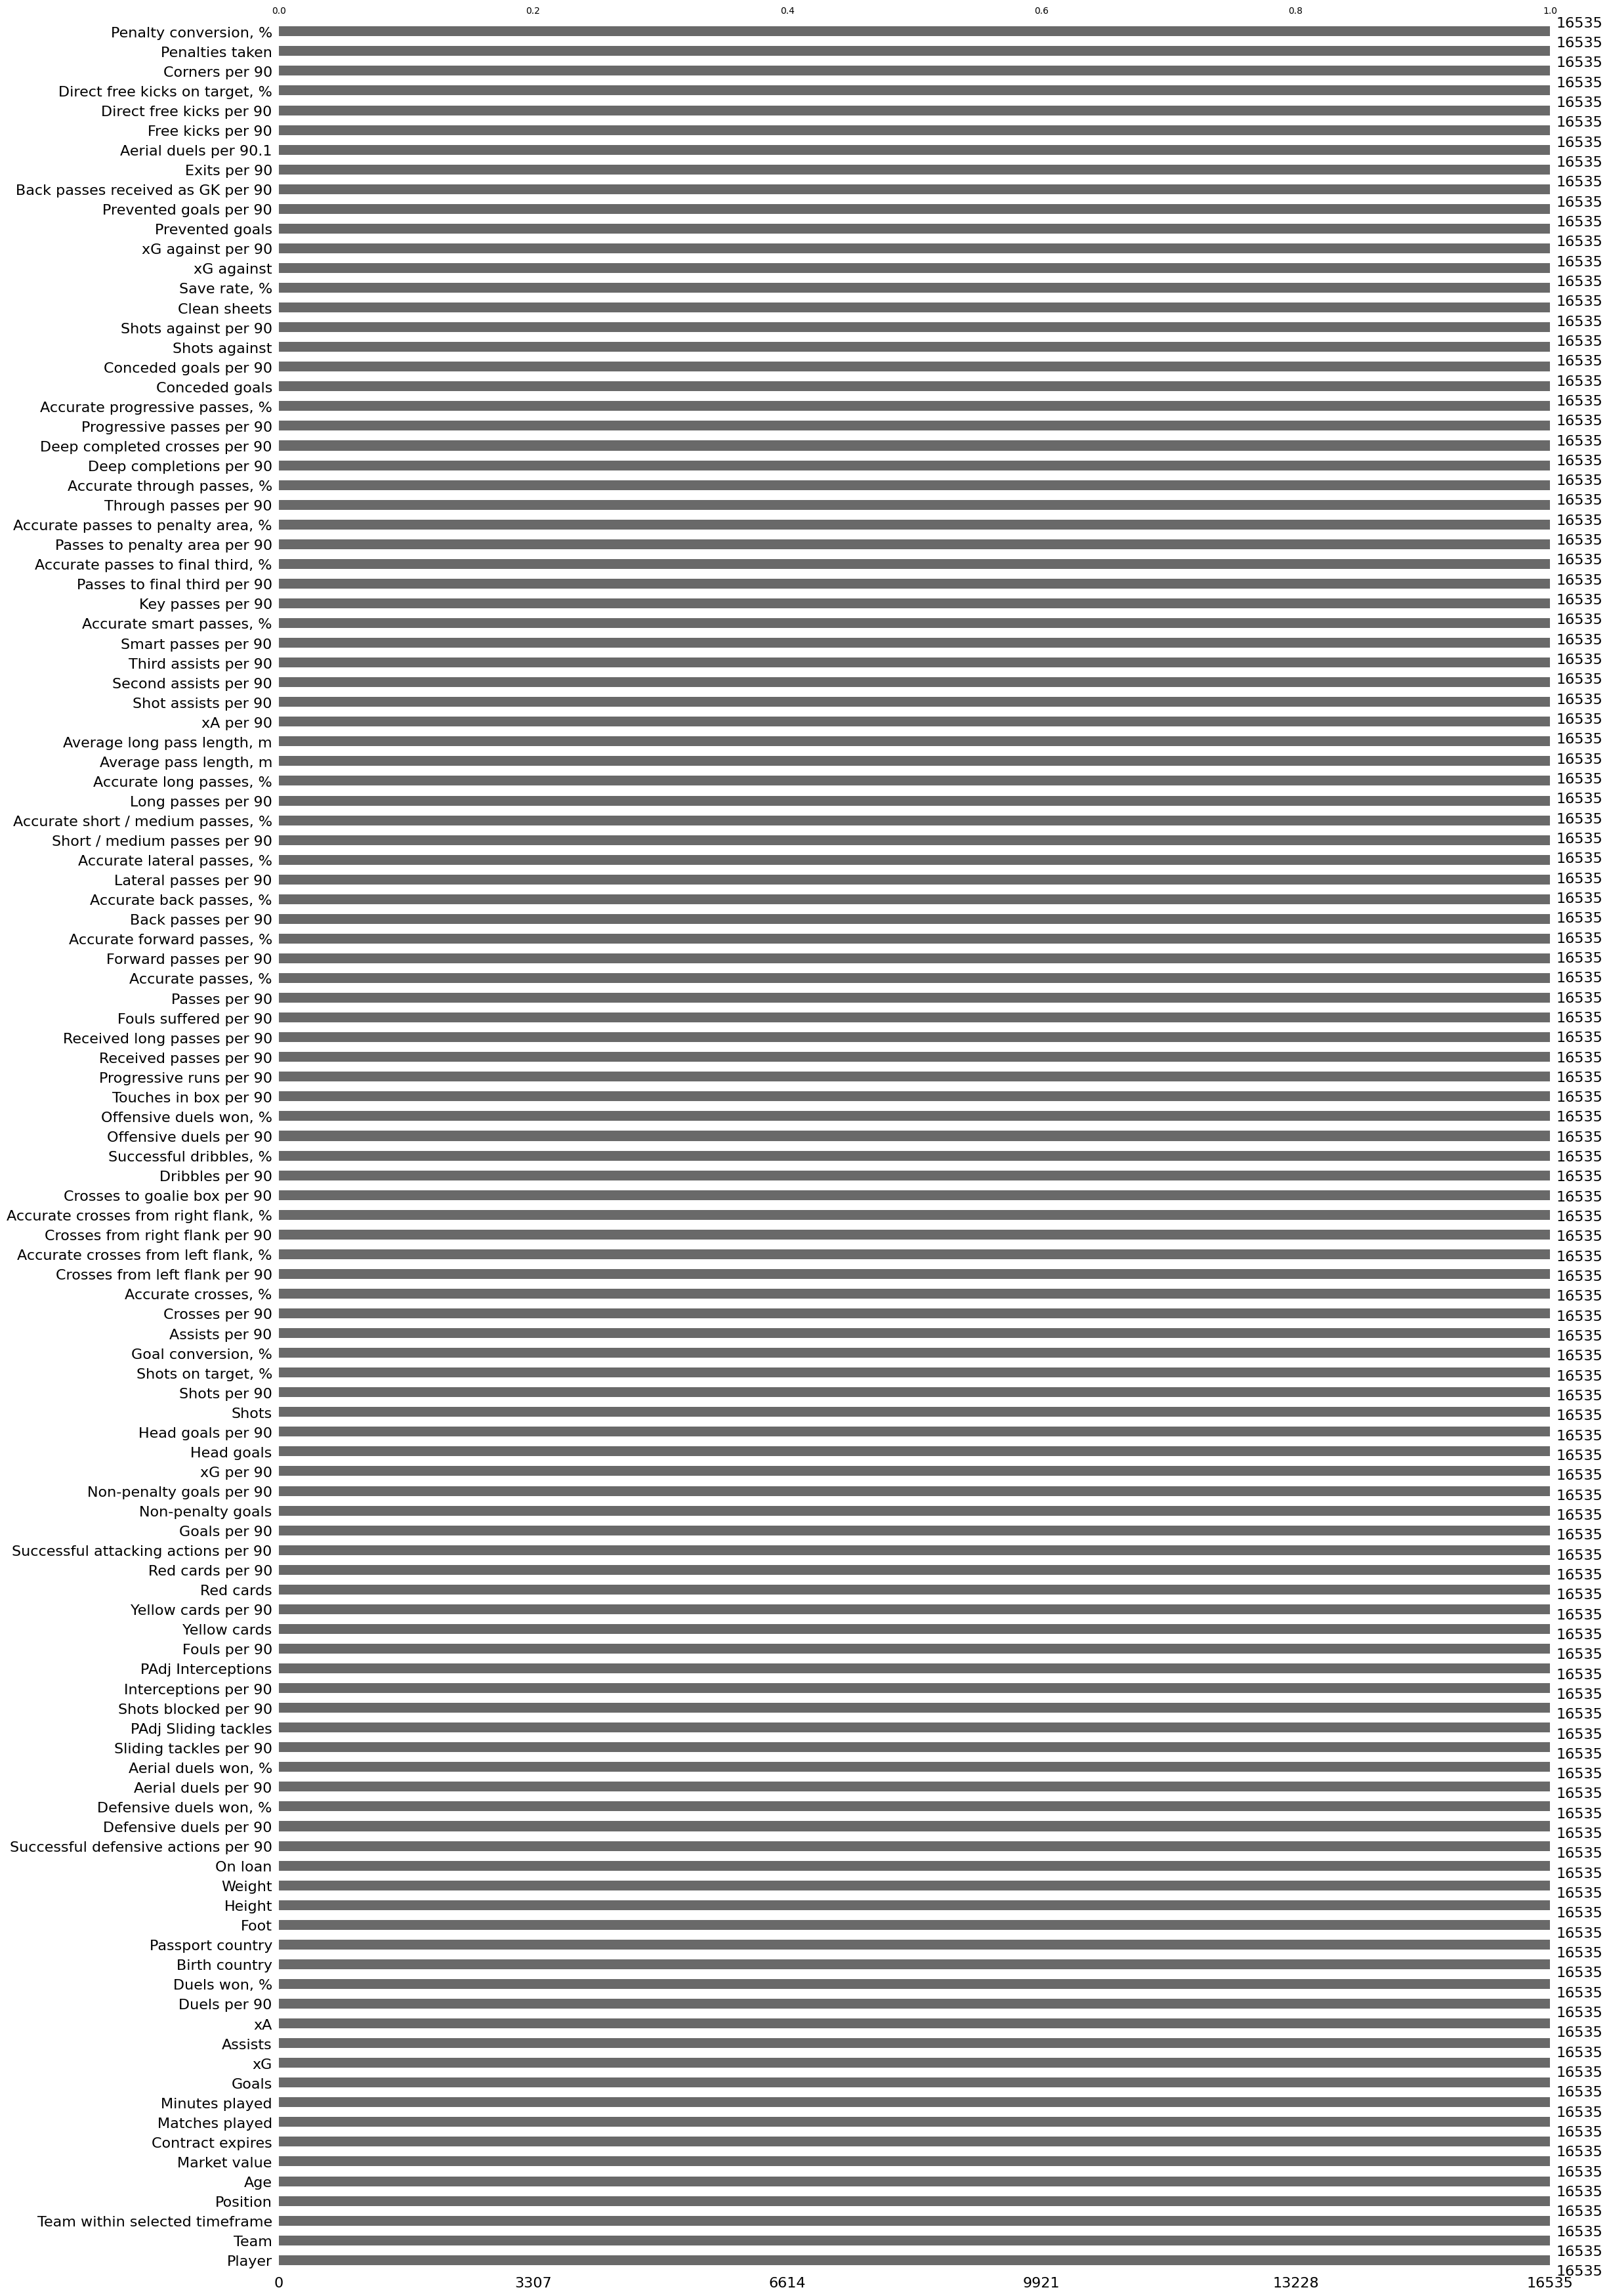

In [10]:
# Identifying numerical objects in my dataframe 
num_variables = df.select_dtypes(include=['number']).columns
obj_variables = df.select_dtypes(include=['object']).columns

# Using the mean strategy to create a simple imputer and applying them to the dataframe
# This fills the missing values in numerical columns with their respective means
nums_imputer = SimpleImputer(strategy='mean')
df[num_variables] = nums_imputer.fit_transform(df[num_variables])

# Here I created a simpleimputer using the most frequent strategy
# This fills the missing values with the most frequent value in the column
obj_imputer = SimpleImputer(strategy='most_frequent')
df[obj_variables] = obj_imputer.fit_transform(df[obj_variables])

msno.bar(df)

#### Checking for duplicates

In [15]:
duplicate_rows = df.duplicated().sum()

print(f'There are {duplicate_rows} duplicates in this dataset')

There are 0 duplicates in this dataset


### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 

In [17]:
# Add your exploratory data analysis of the NAC data here. You can add Mark Down blocks (or output f-strings) to provide explanations to your code, alongside comments made in your code.

#groups the team and market value columns and calculates the mean 
print(df.groupby('Team')['Market value'].mean().reset_index())


grouped_data = df.groupby('Team')['Market value'].mean().reset_index()

#shows the top 10 largest teams by marketvalue 
top_10_teams = grouped_data.nlargest(10, 'Market value') 

                      Team   Market value
0            1599 Şelimbăr  150000.000000
1             1860 München  307894.736842
2              1º Dezembro   41666.666667
3                       AB       0.000000
4     ACS Târgu Mureș 1898   75000.000000
...                    ...            ...
1684               Šibenik  218478.260870
1685         Široki Brijeg  300000.000000
1686              Žalgiris  305172.413793
1687                Žilina  281578.947368
1688             Žilina II   25000.000000

[1689 rows x 2 columns]


### Visualizations

Include all the visualizations you made in this section. This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. Please note down below if you do so.

##### The top 10 teams by Mean Market Value

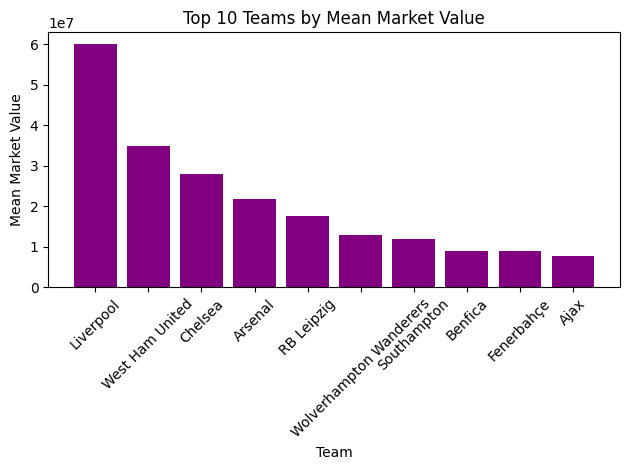

In [20]:
fig, ax = plt.subplots()

ax.bar(top_10_teams['Team'], top_10_teams['Market value'], color='purple') #makes a bar chart of the top 10 teams by marketvalue 
plt.xticks(rotation=45)
plt.title('Top 10 Teams by Mean Market Value')
plt.xlabel('Team')
plt.ylabel('Mean Market Value')
plt.tight_layout()

plt.show()

##### The top 15 goal scorers in the dataset

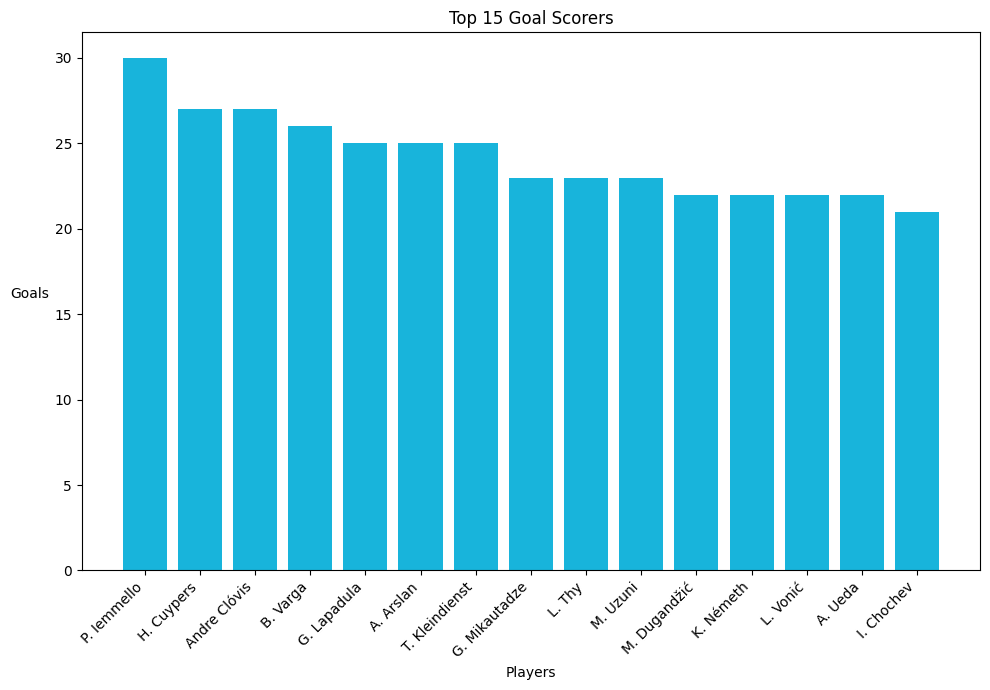

In [21]:
top_scorers = df.sort_values(by='Goals', ascending=False).head(15)

players = top_scorers['Player']
goals = top_scorers['Goals']

plt.figure(figsize=(10, 7))
plt.bar(players, goals, color='#18b4db')
plt.title('Top 15 Goal Scorers')
plt.xlabel('Players')
plt.ylabel('Goals', rotation=0, ha='right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

##### A scatter plot of Goals vs xG

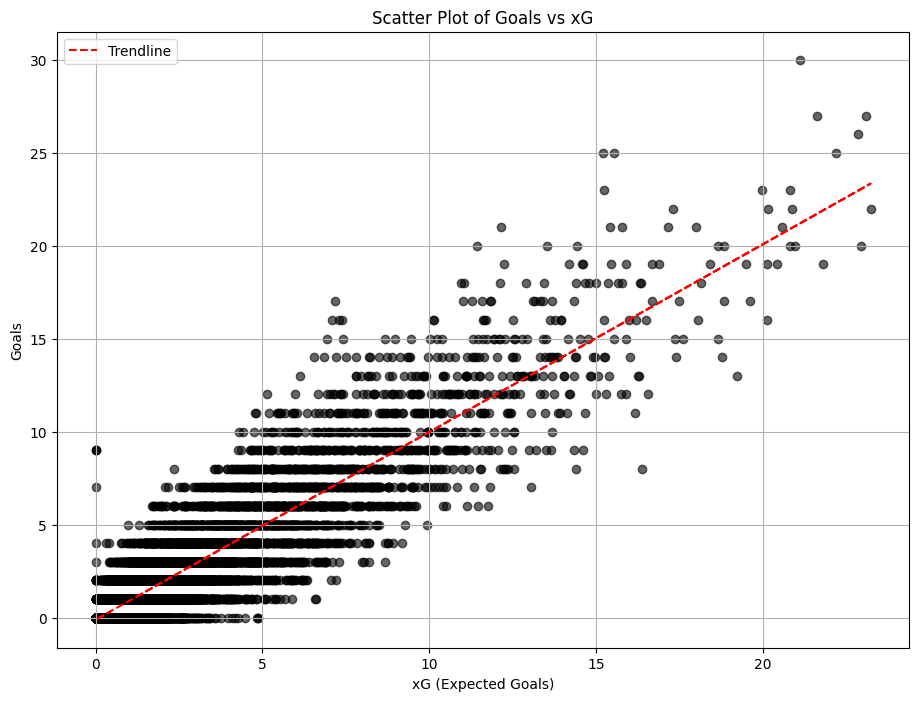

In [22]:
plt.figure(figsize=(11, 8))
plt.scatter(df['xG'], df['Goals'], color='black', alpha=0.6) 
plt.title('Scatter Plot of Goals vs xG')
plt.xlabel('xG (Expected Goals)')
plt.ylabel('Goals')
plt.grid(True)

z = np.polyfit(df['xG'], df['Goals'], 1)
p = np.poly1d(z)
plt.plot(df['xG'], p(df['xG']), color='red', linestyle='--', label='Trendline')

plt.legend()
plt.show()

##### Antother scatter plot of Assists vs xA

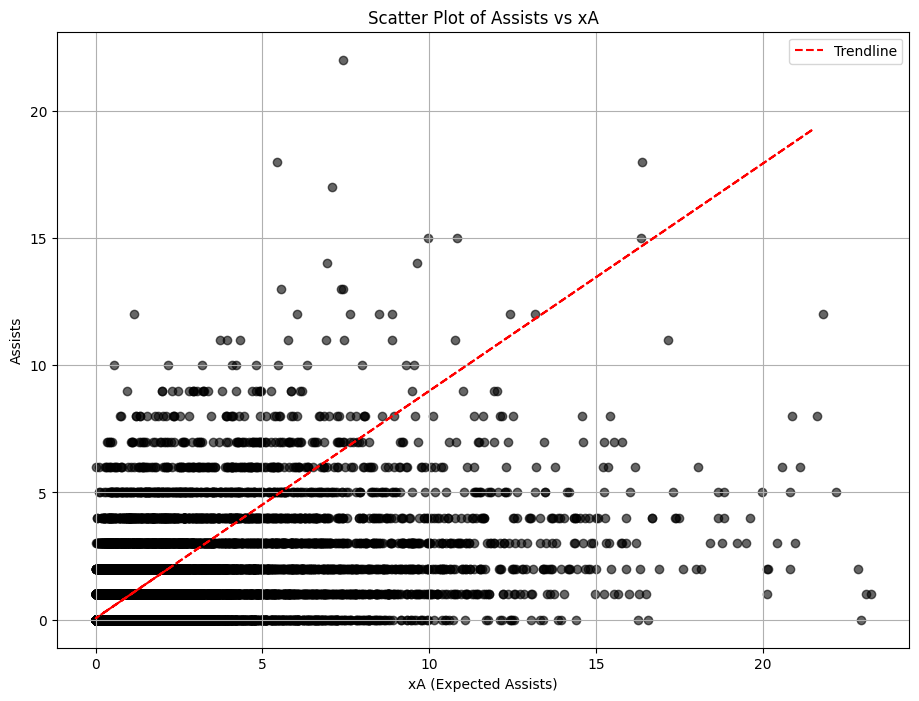

In [23]:
plt.figure(figsize=(11, 8))
plt.scatter(df['xG'], df['Assists'], color='black', alpha=0.6) 
plt.title('Scatter Plot of Assists vs xA')
plt.xlabel('xA (Expected Assists)')
plt.ylabel('Assists')
plt.grid(True)

z = np.polyfit(df['xA'], df['Assists'], 1)
p = np.poly1d(z)
plt.plot(df['xA'], p(df['xA']), color='red', linestyle='--', label='Trendline')

plt.legend()
plt.show()

### **More to be added
###### players with the highest combined goals and assists

### Database and ETL

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

In [ ]:
# This is saved to run at the very end

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

#### Before doing anything, I will split all of the positions that have been joined together so that they can be used properly going forward

In [48]:
# Split the position that are together like (AMF, LMF, RMF...)
df = df.assign(Position=df['Position'].str.split(', ')).explode('Position') 

#### Simple machine learning modelling pipeline

In [51]:
# Enter your code here for a simple machine learning modelling pipeline 


#### Linear regression

##### General Multiple Linear Regression of Market Value vs predicted Market Value:

MSE score for this model: 1656965133506.155
R2 score for this model: 0.05991599369906464


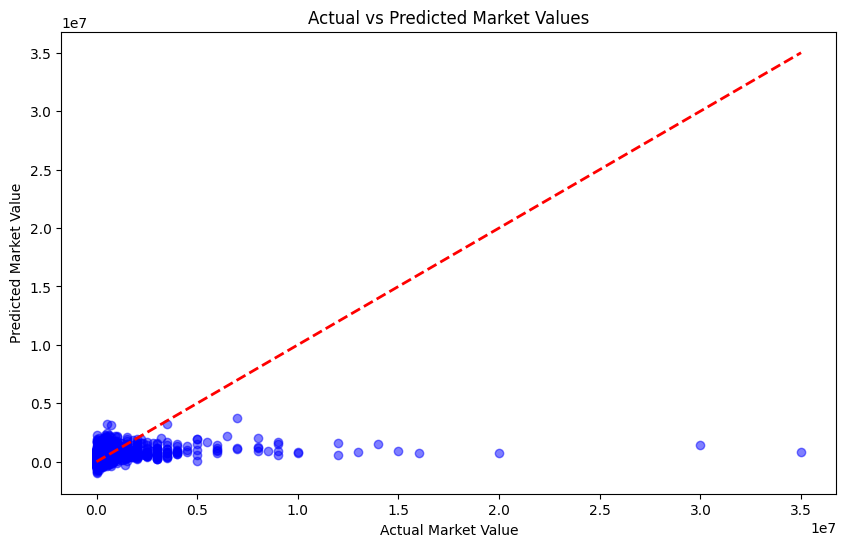

In [35]:
 # The stats used to calculate the scores
features = ['Age', 'Goals', 'Assists', 'xG', 'xA', 'Goal conversion, %', 'Accurate passes, %', 'Accurate crosses, %', 
            'Goals per 90', 'Assists per 90', 'Shots', 'Red cards', 'Weight', 'Height', 'Minutes played', 'Matches played', 
            'Penalties taken', 'Penalty conversion, %']
X_multiple = df[features]

# The target variable
y = df['Market value'] 

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') 
X_multiple_imputed = imputer.fit_transform(X_multiple)

# Split the dataset into training and testing sets
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple_imputed, y, test_size=0.2, random_state=42)

# Create linear regression model
multiple_model = LinearRegression()

# Fit the model to the training data
multiple_model.fit(X_train_multiple, y_train)

y_pred_multiple = multiple_model.predict(X_test_multiple)

# Evaluate the model with multiple metrics
multiple_mse = mean_squared_error(y_test, y_pred_multiple)
multiple_r2 = r2_score(y_test, y_pred_multiple)

print(f'MSE score for this model: {multiple_mse}')
print(f'R2 score for this model: {multiple_r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Market Values')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.show()


##### Linear Regression of Market Value vs Predicted Market Value for Goalkeeper position:

MSE score for this model: 1238562853081.5613
R2 score for this model: 0.12461225037781343


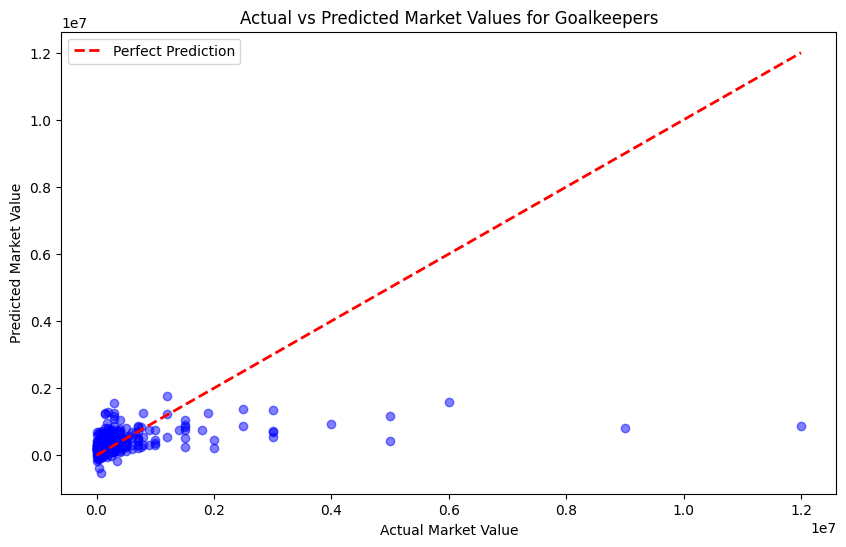

In [76]:
# Creates a new column where 1 means its a 'GK' and 0 means its not a 'GK'
df['IsGoalkeeper'] = df['Position'].apply(lambda x: 1 if isinstance(x, str) and 'GK' in x else 0) 

# This filters the IsGoalkeeper column so that it only uses the 1s so only if its says its a 'Gk'
goalkeeper_data = df[df['IsGoalkeeper'] == 1] 

features = ['Age', 'Clean sheets', 'Prevented goals', 'Prevented goals per 90', 'Save rate, %', 'xG against', 'Conceded goals', 
            'Conceded goals per 90', 'Back passes received as GK per 90', 'xG against per 90', 'Height', 'Weight', 'Minutes played', 
            'Matches played', 'Duels per 90', 'Duels won, %', 'Successful defensive actions per 90', 'Yellow cards', 'Shots against', 
            'Shots against per 90']
X_goalkeeper = goalkeeper_data[features]
y_goalkeeper = goalkeeper_data['Market value']

imputer = SimpleImputer(strategy='mean')
X_goalkeeper_imputed = imputer.fit_transform(X_goalkeeper)

X_train, X_test, y_train, y_test = train_test_split(X_goalkeeper_imputed, y_goalkeeper, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE score for this model: {mse}')
print(f'R2 score for this model: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Market Values for Goalkeepers')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.legend()
plt.show()

##### Linear Regression of Market Value vs Predicted Market Value for Attackers:

MSE score for this model: 2621119516564.7046
R2 score for this model: 0.10284103945587642


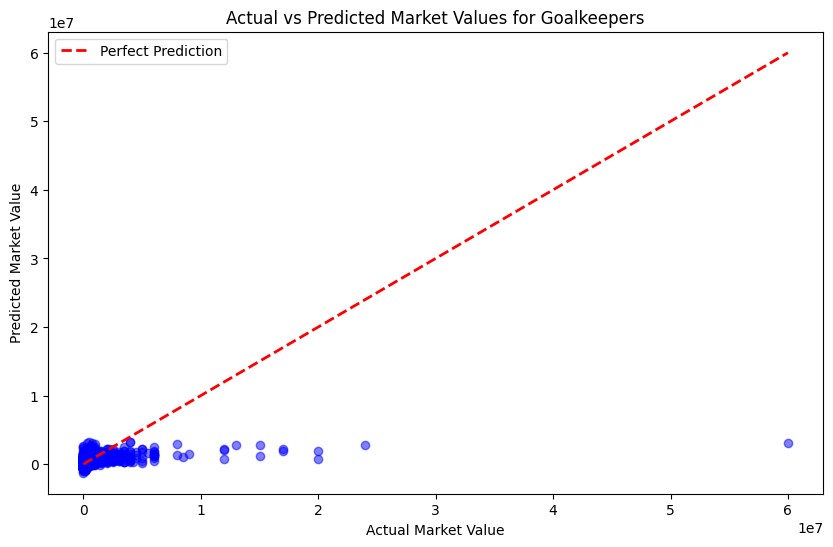

In [96]:
positions_to_check = ['RW', 'AMF', 'CF', 'LWF', 'RWF', 'LW']

df['IsAttacker'] = df['Position'].apply(lambda x: 1 if isinstance(x, str) and any(pos in x for pos in positions_to_check) else 0) 

# This filters the IsGoalkeeper column so that it only uses the 1s so only if its says its a 'Gk'
attacker_data = df[df['IsAttacker'] == 1] 

features = ['Age', 'Height', 'Weight', 'Minutes played', 'Matches played', 'Yellow cards',
            'Penalties taken', 'Penalty conversion, %', 'Free kicks per 90', 'Direct free kicks per 90', 'Third assists per 90', 
            'Second assists per 90', 'Shot assists per 90', 'xA per 90', 'Successful dribbles, %', 'Dribbles per 90', 'Goal conversion, %',
            'Shots on target, %', 'Shots on target, %', 'Shots per 90', 'Shots', 'Head goals per 90', 'Head goals', 'xG per 90', 
            'Non-penalty goals per 90', 'Non-penalty goals', 'Goals per 90', 'Successful attacking actions per 90', 'xG', 'xA', 'Goals', 
            'Progressive runs per 90', 'Received passes per 90', 'Received long passes per 90', 'Fouls suffered per 90', 'Passes per 90', 
            'Accurate passes, %']
X_attacker = attacker_data[features]
y_attacker = attacker_data['Market value']

imputer = SimpleImputer(strategy='mean')
X_attacker_imputed = imputer.fit_transform(X_attacker)

X_train, X_test, y_train, y_test = train_test_split(X_attacker_imputed, y_attacker, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE score for this model: {mse}')
print(f'R2 score for this model: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Market Values for Goalkeepers')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.legend()
plt.show()

##### Linear Regression of Market Value vs Predicted Market Value for Mifielders:

MSE score for this model: 1641773256493.2861
R2 score for this model: 0.12194357569619152


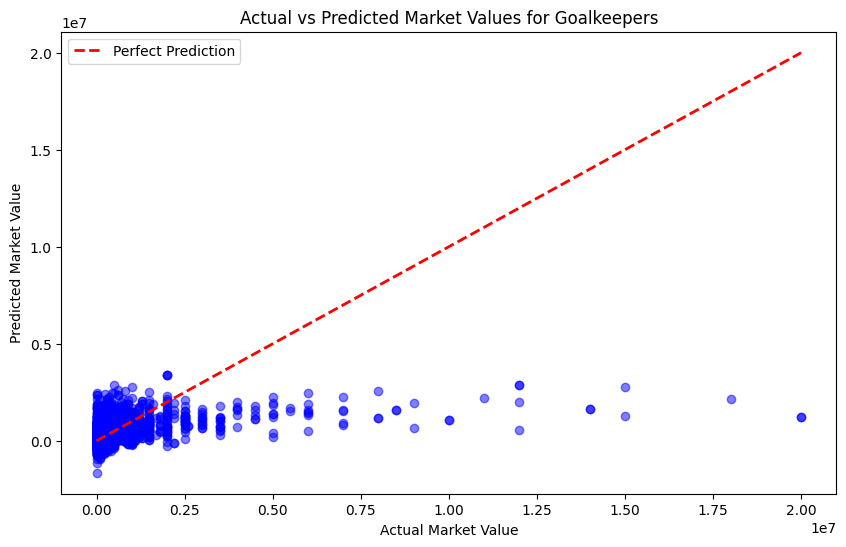

In [111]:
positions_to_check = ['AMF', 'DMF', 'RCMF', 'LDMF', 'RDMF', 'LCMF']

df['IsMidfielder'] = df['Position'].apply(lambda x: 1 if isinstance(x, str) and any(pos in x for pos in positions_to_check) else 0) 

# This filters the IsGoalkeeper column so that it only uses the 1s so only if its says its a 'Gk'
midfielder_data = df[df['IsMidfielder'] == 1] 

features = ['Age', 'Height', 'Weight', 'Minutes played', 'Matches played', 'Yellow cards', 'Third assists per 90', 'Second assists per 90', 
            'Assists', 'xG', 'xA', 'Goals', 'Accurate progressive passes, %', 'Progressive passes per 90', 'Deep completed crosses per 90',
            'Assists per 90', 'Crosses per 90', 'Accurate crosses, %', 'Crosses from left flank per 90', 'Accurate crosses from left flank, %',
            'Crosses from right flank per 90', 'Accurate crosses from right flank, %', 'Crosses to goalie box per 90', 'Fouls suffered per 90', 
            'Passes per 90', 'Accurate passes, %', 'Forward passes per 90', 'Accurate forward passes, %', 'Back passes per 90', 'Accurate back passes, %',
            'Lateral passes per 90', 'Accurate lateral passes, %', 'Short / medium passes per 90', 'Accurate short / medium passes, %', 'Long passes per 90',
            'Accurate long passes, %', 'Average pass length, m', 'Average long pass length, m', 'xA per 90', 'Shot assists per 90', 'Second assists per 90',
            'Third assists per 90', 'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90', 'Passes to final third per 90',
            'Accurate passes to final third, %', 'Passes to penalty area per 90', 'Accurate passes to penalty area, %', 'Through passes per 90',
            'Accurate through passes, %', 'Deep completions per 90', 'Deep completed crosses per 90', 'Progressive passes per 90',
            'Accurate progressive passes, %']

X_midfielder = midfielder_data[features]
y_midfielder = midfielder_data['Market value']

imputer = SimpleImputer(strategy='mean')
X_midfielder_imputed = imputer.fit_transform(X_midfielder)

X_train, X_test, y_train, y_test = train_test_split(X_midfielder_imputed, y_midfielder, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE score for this model: {mse}')
print(f'R2 score for this model: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Market Values for Goalkeepers')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.legend()
plt.show()

##### Linear Regression of Market Value vs Predicted Market Value for Defenders:

MSE score for this model: 1696389246167.3796
R2 score for this model: 0.05178938236093722


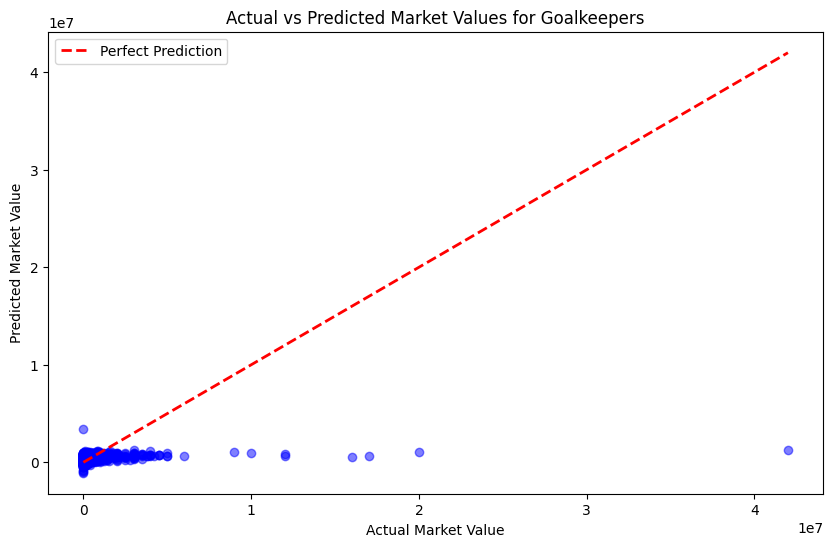

In [110]:
positions_to_check = ['CB', 'RCB', 'LCB', 'LB', 'RB', 'LWB', 'RWB']

df['IsDefender'] = df['Position'].apply(lambda x: 1 if isinstance(x, str) and any(pos in x for pos in positions_to_check) else 0) 

# This filters the IsGoalkeeper column so that it only uses the 1s so only if its says its a 'Gk'
defender_data = df[df['IsDefender'] == 1] 

features = ['Age', 'Height', 'Weight', 'Minutes played', 'Matches played', 'Prevented goals per 90', 'Prevented goals', 'xG against per 90',
            'xG against', 'Shots against', 'Red cards per 90', 'Red cards', 'Yellow cards per 90', 'Fouls per 90', 'PAdj Interceptions', 
            'Interceptions per 90', 'Shots blocked per 90', 'PAdj Sliding tackles', 'Sliding tackles per 90', 'Aerial duels won, %',
            'Aerial duels per 90', 'Defensive duels won, %', 'Defensive duels per 90', 'Successful defensive actions per 90', 'Duels won, %', 
            'Duels per 90']

X_defender = defender_data[features]
y_defender = defender_data['Market value']

imputer = SimpleImputer(strategy='mean')
X_defender_imputed = imputer.fit_transform(X_defender)

X_train, X_test, y_train, y_test = train_test_split(X_defender_imputed, y_defender, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE score for this model: {mse}')
print(f'R2 score for this model: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Market Values for Goalkeepers')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.legend()
plt.show()

#### Try this with individual positions

#### Logistic regression

In [53]:
# Enter your code here for logistic regression

#### Tree-based model

In [ ]:
# Enter your code here for tree-based decision model

#### Gradient Boosting Trees and SVM

In [ ]:
# Enter your code here for Gradient Boosting

In [ ]:
# Enter your code here for SVM

#### Unsupervised learning with K-Means

In [ ]:
# Enter your code here for K-means

#### Correlation Analysis and Feature Selection


In [4]:
# Enter your code here for your correlation analysis

In [ ]:
# Enter your code here for your feature selection. Add markdown comments for why you chose these features below.

✍️ I chose the features above because ...

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

In [5]:
# Enter your code here for the model evaluation. Add your interpretation in the markdown below.

✍️ Interpretation of the model evaluation: ...

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

In [6]:
# Add your code here for improving the model performance

✍️ I improved my model by ...

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. This is related to the excellent criteria of ILO 5.0.  

In [ ]:
# Add your code here for comparing your models. Describe in the markdown below why the model you chose is the best model.

✍️ The model is chose is the best because ...

### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

In [3]:
# Provide the link to the assignment on elementary operations on matrices here

Please provide your code for Task 2 of assignment on elementary operations on matrices.

In [2]:
# Put the codes for Task 2 of assignment on elementary operations on matrices here

### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

In [1]:
# Add your code here

### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

In [4]:
# A link to the certificate of completion 

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

In [ ]:
# Put your code here

### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

In [5]:
# A link to a PDF file for assignments 1-3

Put your code  for assignment 4 in the following cell.

In [ ]:
# Put your code for assignment 4 here.

### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

In [6]:
# Put your code here

### Assignments for "DataLab: Linear Regression with Gradient Descent"

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

In [7]:
# Put your code here